# 📦 Required Dependencies

In [1]:
!pip install super_gradients
!pip install tqdm

  Using cached stringcase-1.2.0-py3-none-any.whl
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached xhtml2pdf-0.2.11-py3-none-any.whl
  Using cached svglib-1.5.1-py3-none-any.whl
  Using cached antlr4_python3_runtime-4.9.3-py3-none-any.whl
  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: cryptography
    Found existing installation: cryptography 35.0.0
    Uninstalling cryptogr

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\saira\\AppData\\Local\\Temp\\pip-uninstall-mvmabpg1\\pip.exe'
Consider using the `--user` option or check the permissions.



In [2]:
import os
import shutil
import random
from tqdm.notebook import tqdm
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val
import torch
from super_gradients.training import models
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback


The console stream is logged into C:\Users\saira\sg_logs\console.log


[2024-04-24 23:07:30] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-04-24 23:07:32,222] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.


[WARNING]No module named 'pycocotools'


[2024-04-24 23:08:28] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


# 💾 Datasets and DataLoaders

In [3]:
dataset_params = {
    'data_dir':'D:\VIT\Sem 8\Face-rec\dataset',
    'train_images_dir':'D:\VIT\Sem 8\Face-rec\dataset\images\Train',
    'train_labels_dir':'D:\VIT\Sem 8\Face-rec\dataset\labels\Train',
    'val_images_dir':'D:\VIT\Sem 8\Face-rec\dataset\images\Val',
    'val_labels_dir':'D:\VIT\Sem 8\Face-rec\dataset\labels\Val',
    'test_images_dir':'D:\VIT\Sem 8\Face-rec\dataset\images\Train',
    'test_labels_dir':'D:\VIT\Sem 8\Face-rec\dataset\labels\Train',
    'classes': ['face']    
}
     

In [4]:
MODEL_ARCH = 'yolo_nas_l'
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
if torch.cuda.is_available():
    print("GPU")
else:
    print("CPU")
BATCH_SIZE = 8
MAX_EPOCHS = 20
CHECKPOINT_DIR = f'working'
EXPERIMENT_NAME = f'yolo_nas_face'

     

In [5]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 1
    }
)

CPU


[2024-04-24 23:08:28] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 13386/13386 [01:36<00:00, 138.26it/s]
[2024-04-24 23:10:05] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 3347/3347 [00:26<00:00, 127.32it/s]
[2024-04-24 23:10:32] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:  97%|█████████▋| 12986/13386 [00:06<00:00, 2415.16it/s]

In [6]:
train_data.dataset.transforms

Indexing dataset annotations: 100%|██████████| 13386/13386 [00:07<00:00, 1890.51it/s]


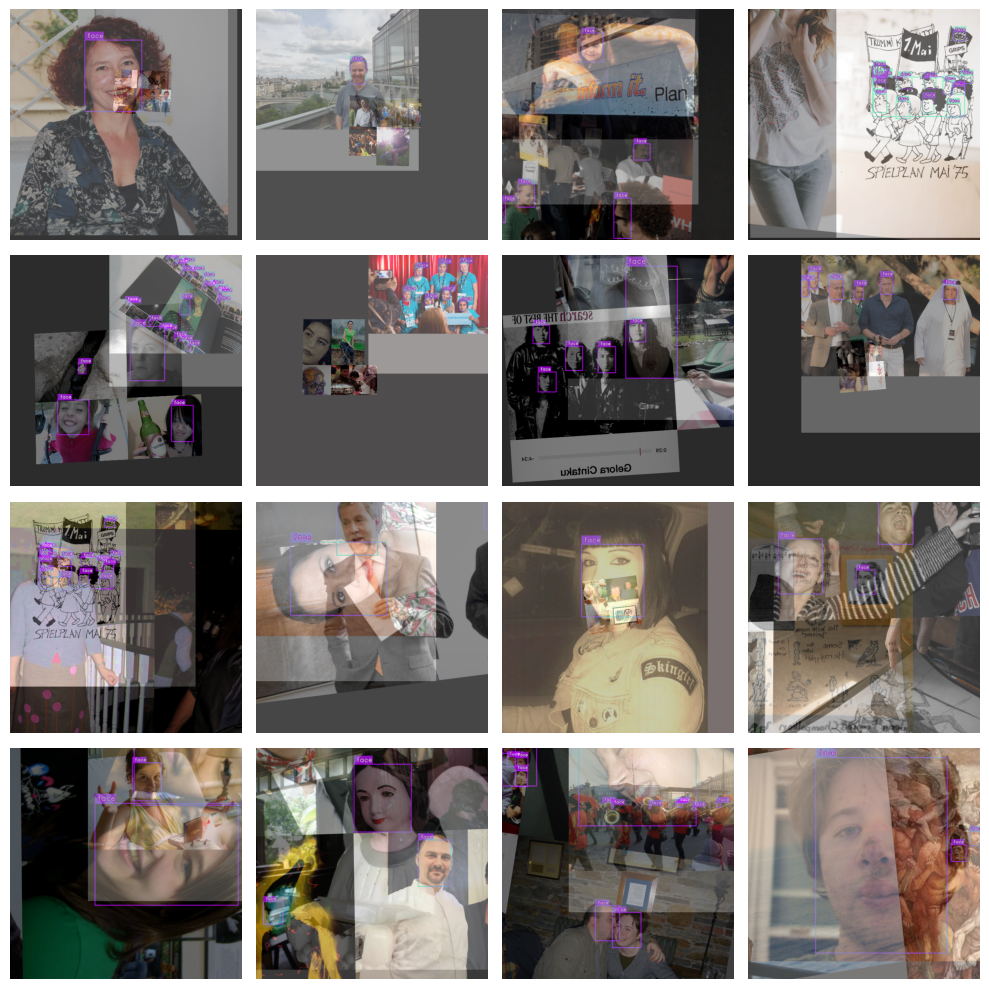

In [7]:
train_data.dataset.plot()

# ⚙️ Initializing the model

In [8]:
model = models.get(
    MODEL_ARCH, 
    num_classes=len(dataset_params['classes']), 
    pretrained_weights="coco"
)

[2024-04-24 23:10:45] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-04-24 23:10:45] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-04-24 23:10:45] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


# 🔍 Training parameters

In [9]:
train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}
     

# ⏳ Training the model

In [10]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

In [13]:
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2024-02-09 18:24:05] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240209_182405_443591`
[2024-02-09 18:24:05] INFO - sg_trainer.py - Checkpoints directory: working\yolo_nas_face\RUN_20240209_182405_443591
[2024-02-09 18:24:05] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to working\yolo_nas_face\RUN_20240209_182405_443591/console_Feb09_18_24_05.txt


e:\Anaconda\envs\godhelp\lib\site-packages\super_gradients\common\registry\registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
e:\Anaconda\envs\godhelp\lib\site-packages\super_gradients\training\utils\optimizer_utils.py:108: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
  warnings.warn(
e:\Anaconda\envs\godhelp\lib\site-packages\super_gradients\training\sg_trainer\sg_trainer.py:1709: UserWarning: Mixed precision training is not supported on CPU. Disabling mixed precision. (i.e. `mixed_precision=F

Train epoch 0:   0%|          | 0/1673 [00:06<?, ?it/s]
[2024-02-09 18:24:29] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2024-02-09 18:24:29] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2024-02-09 18:24:29] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


# 📈 Inference and Visualization

In [11]:
checkpoint_path = "D:\VIT\Sem 8\Face-rec\ckpt_best.pth"  # Replace with your checkpoint path
best_model = models.get(MODEL_ARCH, num_classes=len(dataset_params['classes']), checkpoint_path=checkpoint_path).to(DEVICE)

[2024-02-13 23:03:33] INFO - checkpoint_utils.py - Successfully loaded model weights from D:\VIT\Sem 8\Face-rec\ckpt_best.pth EMA checkpoint.


In [ ]:
torch.save(best_model.state_dict(), "/kaggle/output/model.pth")

e:\Anaconda\envs\godhelp\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2024-02-13 23:03:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


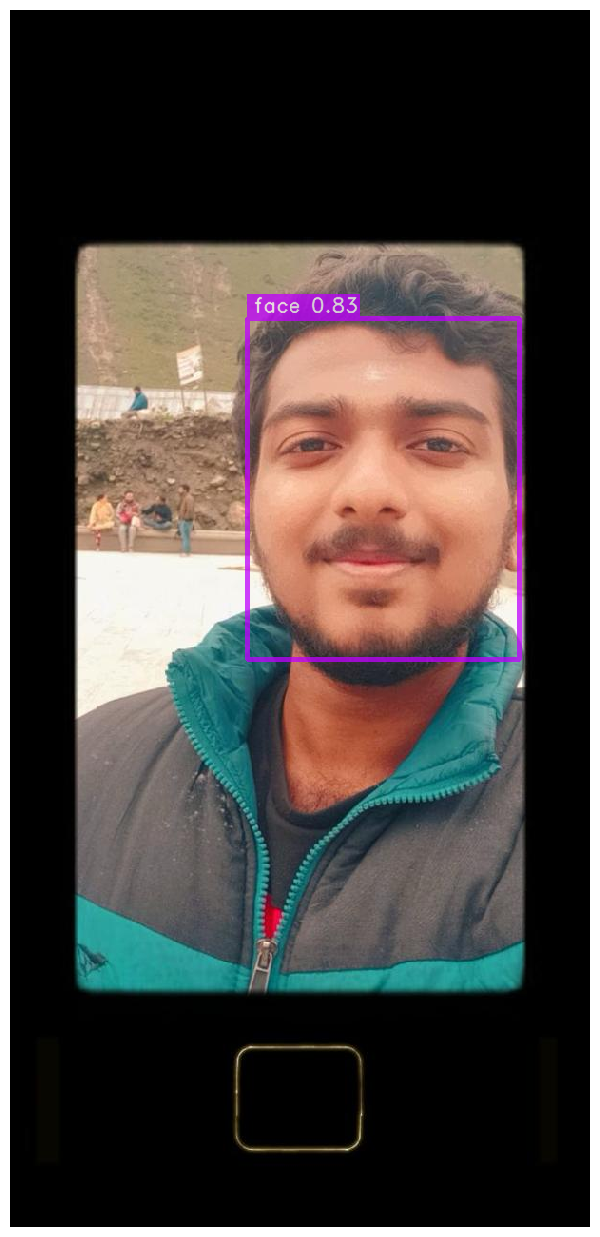

In [12]:
img_1 = "D:\VIT\Sem 8\Face-rec\Facenetdata\IMG-20240208-WA0012.jpg"
best_model.predict(img_1).show()

[2024-02-13 23:03:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


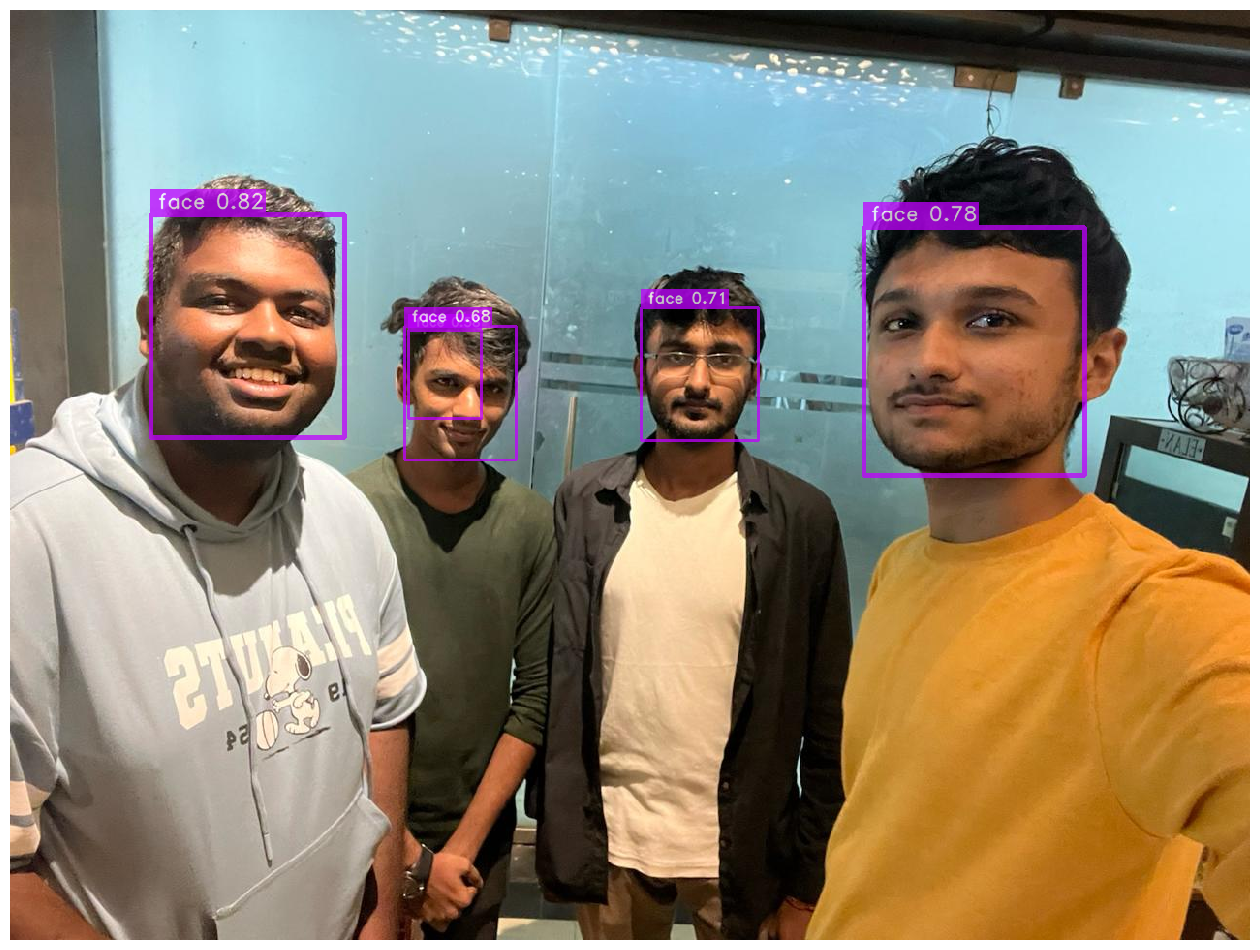

In [13]:
img_2 = "D:\VIT\Sem 8\Face-rec\Facenetdata\WhatsApp Image 2024-02-13 at 13.07.22_85041a56.jpg"
best_model.predict(img_2).show()